In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.linear_algebra.svd_core import compute_truncated_svd
from src.ml.clustering import run_kmeans, compute_silhouette
from src.visualization.clustering_plots import plot_clusters_2d


In [3]:
X = pd.read_csv(r"../Data/processed/X_processed.csv").values


In [4]:
U_reduced, singular_values, svd_model = compute_truncated_svd(
    X,
    n_components=10
)


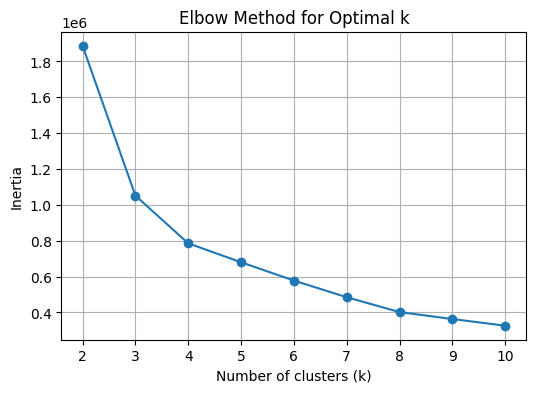

In [5]:
inertias = []
k_values = range(2, 11)

for k in k_values:
    _, model = run_kmeans(U_reduced[:, :2], k)
    inertias.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


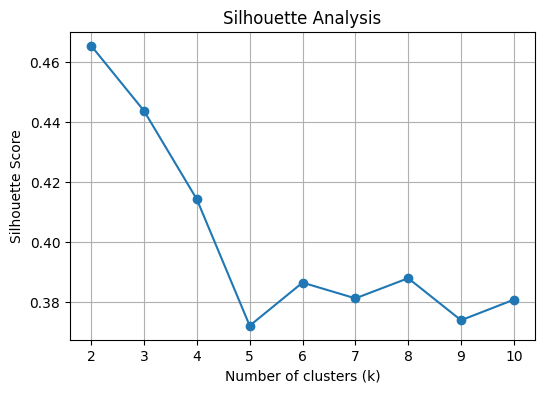

In [6]:
silhouette_scores = []

for k in k_values:
    labels, _ = run_kmeans(U_reduced[:, :2], k)
    score = compute_silhouette(U_reduced[:, :2], labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)
plt.show()


In [7]:
k_optimal = 3

cluster_labels, kmeans_model = run_kmeans(
    U_reduced[:, :2],
    n_clusters=k_optimal
)


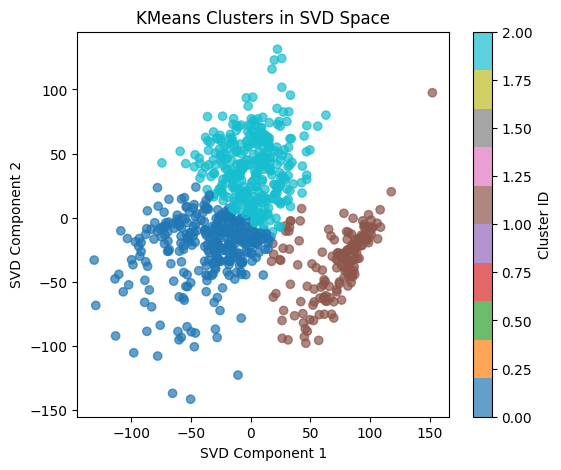

In [8]:
plot_clusters_2d(
    U_reduced[:, :2],
    cluster_labels,
    save_path="../results/figures/kmeans_clusters_svd.png"
)


In [9]:
cluster_df = pd.DataFrame({
    "sample_index": range(len(cluster_labels)),
    "cluster": cluster_labels
})

cluster_df.to_csv(
    "../results/tables/cluster_assignments.csv",
    index=False
)

cluster_df.head()


,sample_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,2
